In [1]:
import os
import pandas as pd
from getCitation import get_doi, get_citation
from getConvertedImages import convert_pdf_to_images
from DECIMERmodules import getPredictedSegments
from getDisplayMols import get_display
from ipydatagrid import Expr, DataGrid, TextRenderer, BarRenderer

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
2023-05-05 17:33:52.873780: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-05 17:33:52.951101: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-05 17:33:54.146803: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neu

Instructions for updating:
Use fn_output_signature instead
2.10.0


In [2]:
filename = "np070194x.pdf"

Katavic, P. L., Lamb, K., Navarro, H., & Prisinzano, T. E. (2007). Flavonoids as Opioid Receptor Ligands:â Identification and Preliminary StructureâActivity Relationships. Journal of Natural Products, 70(8), 1278â1282. https://doi.org/10.1021/np070194x


In [3]:
image_paths = convert_pdf_to_images(filename)

In [ ]:
All_Predictions = []
my_dict = {}
for i in range(len(image_paths)):
    Predictions = getPredictedSegments(image_paths[i])
    if (Predictions != "No segments") and (len(Predictions) < 302):
        my_dict[os.path.split(image_paths[i])[1]] = Predictions
        All_Predictions.append(Predictions)

No masks found.


np070194x._1.png
np070194x._1_0.png


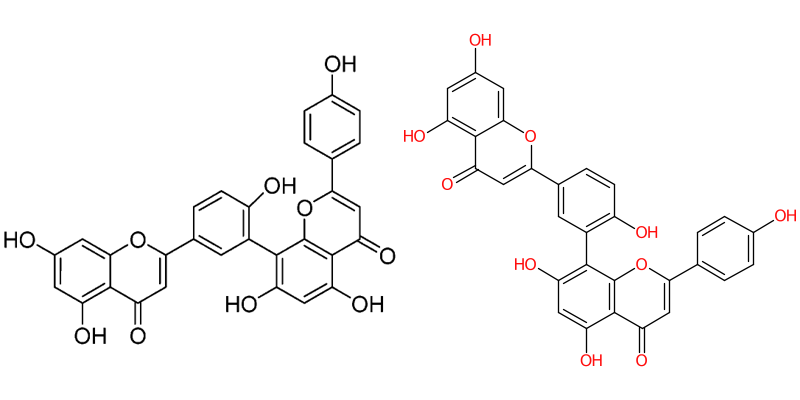

np070194x._1_1.png


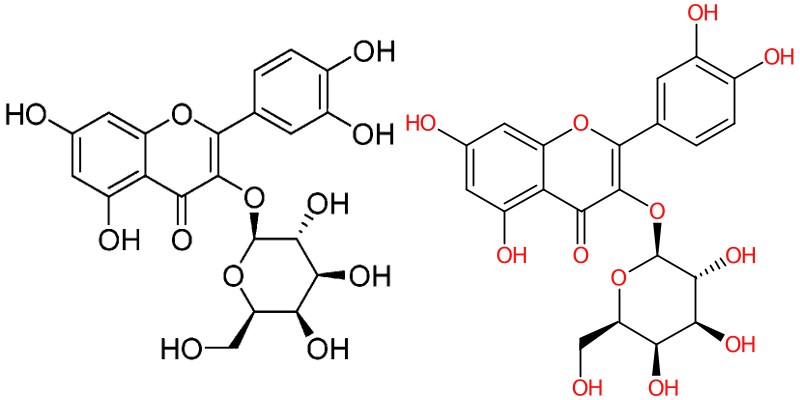

np070194x._1_2.png


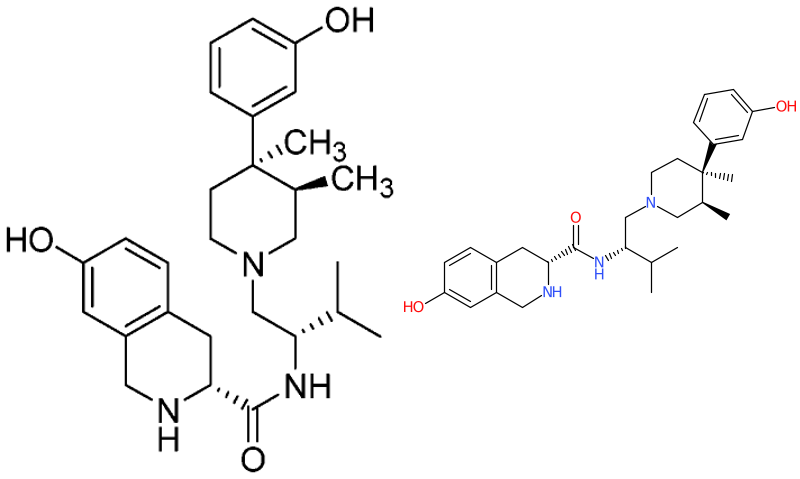

np070194x._1_3.png


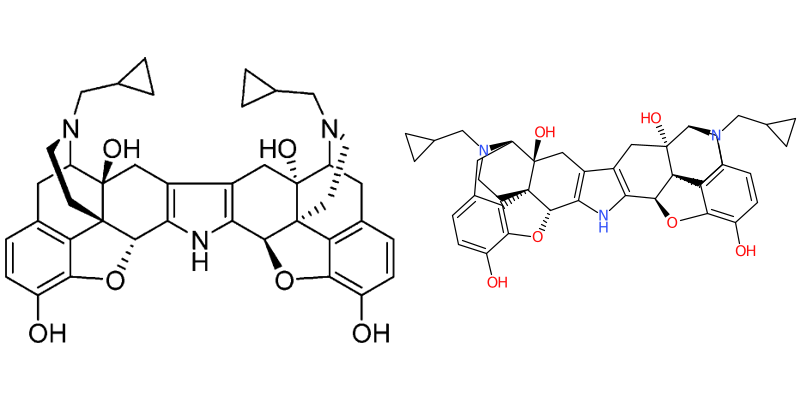

np070194x._1_4.png


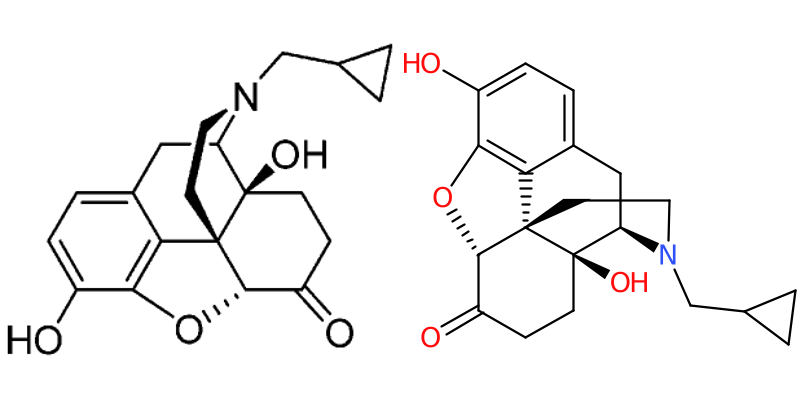

np070194x._1_5.png


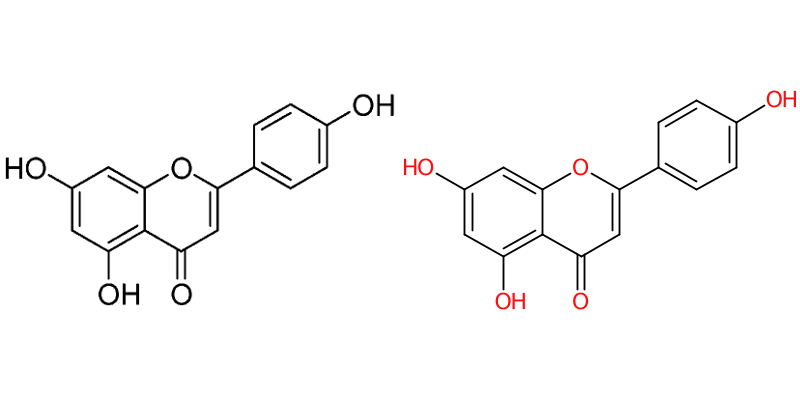

np070194x._1_6.png


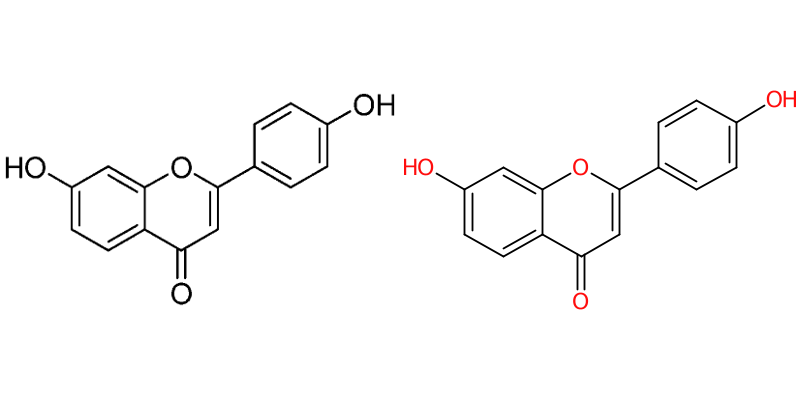

np070194x._1_7.png


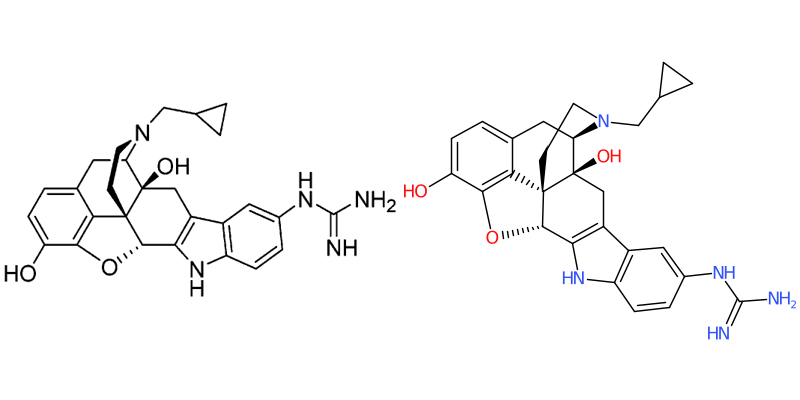

np070194x._1_8.png


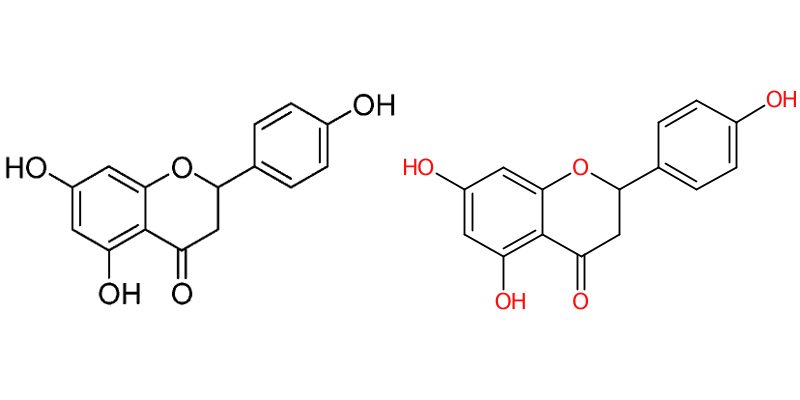

np070194x._2.png
np070194x._2_0.png


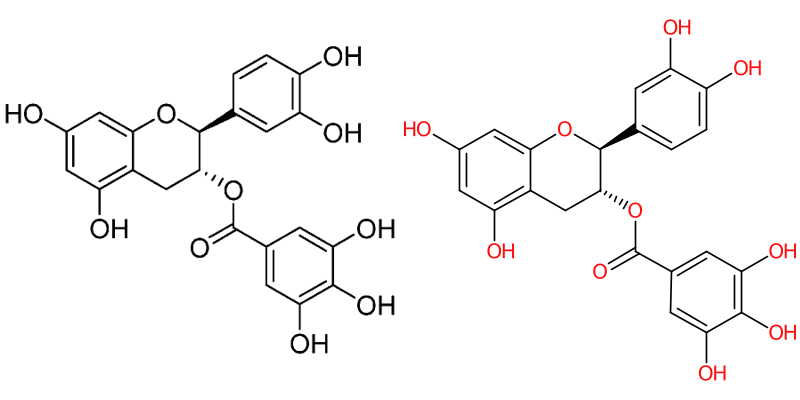

np070194x._2_1.png


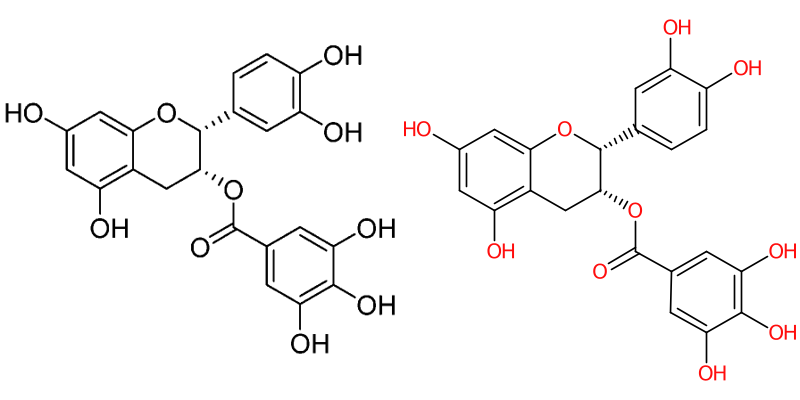

np070194x._2_2.png


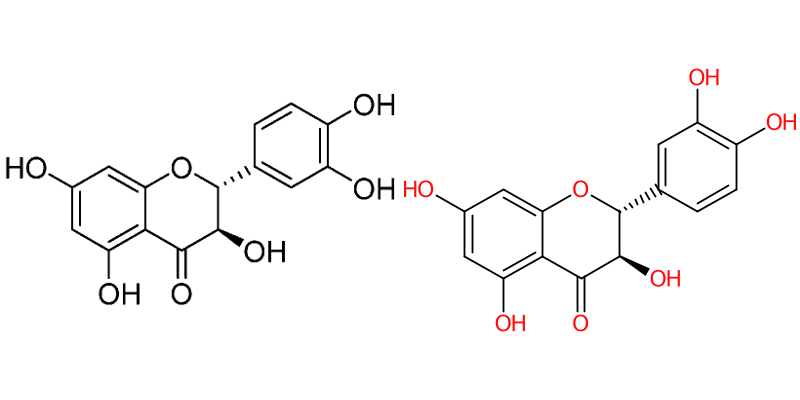

np070194x._2_3.png


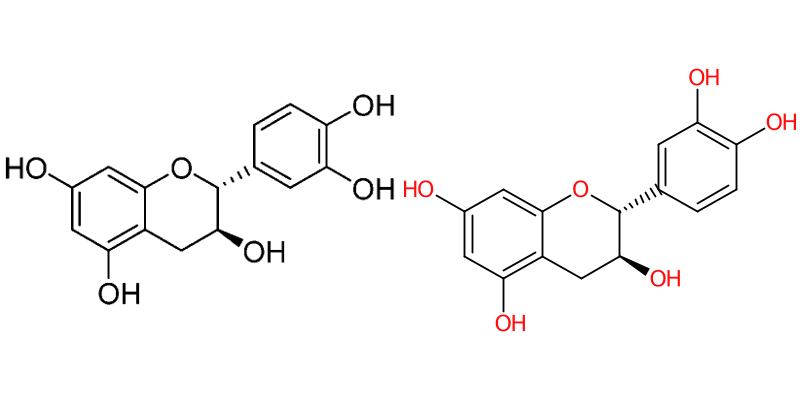

np070194x._2_4.png


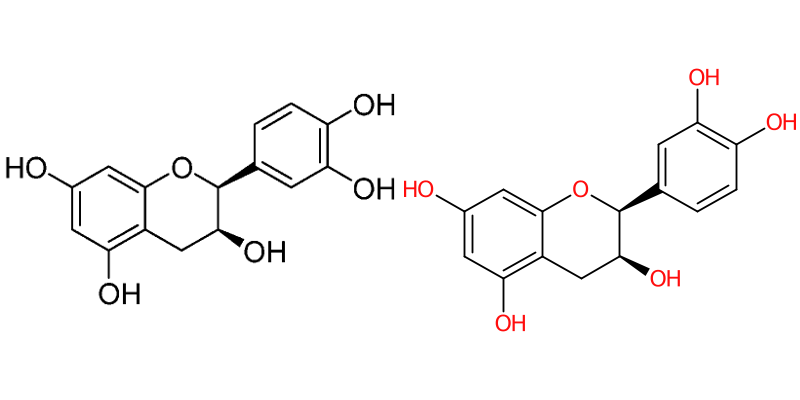

np070194x._2_5.png


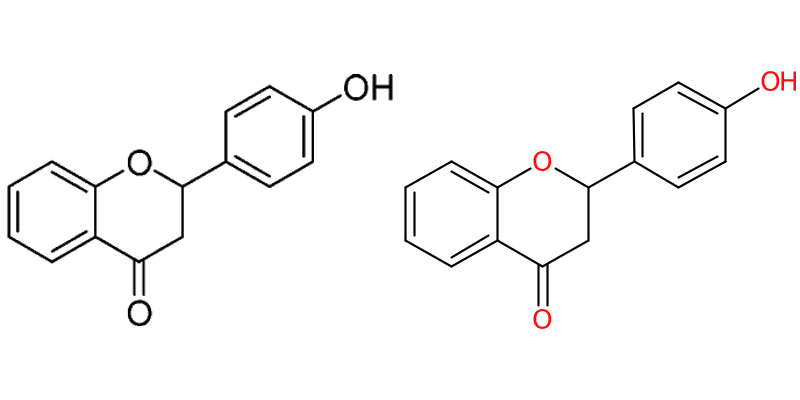

np070194x._2_6.png


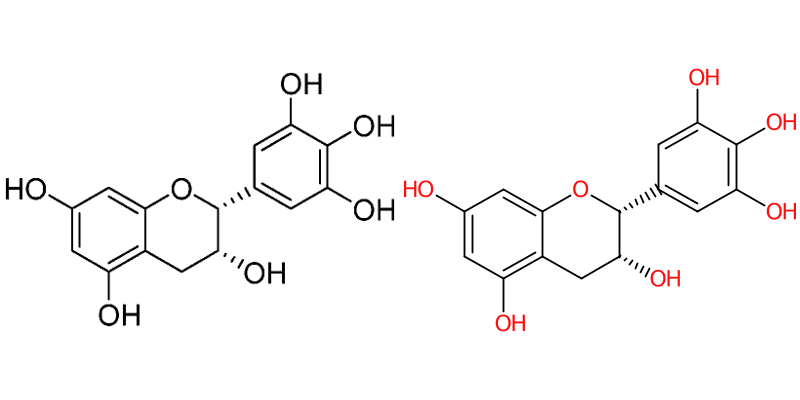

np070194x._2_7.png


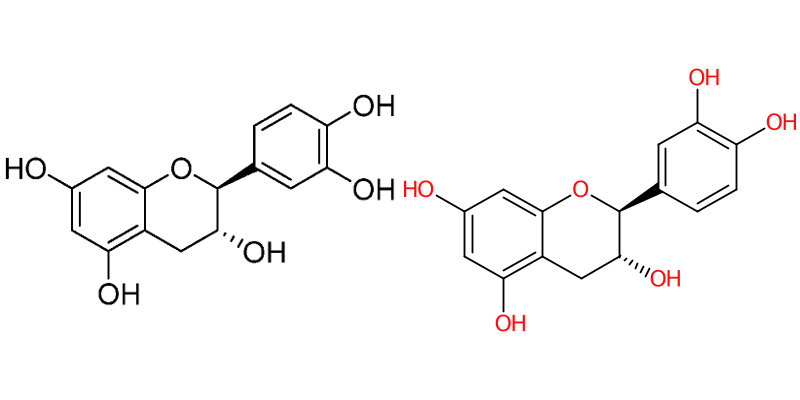

np070194x._2_8.png


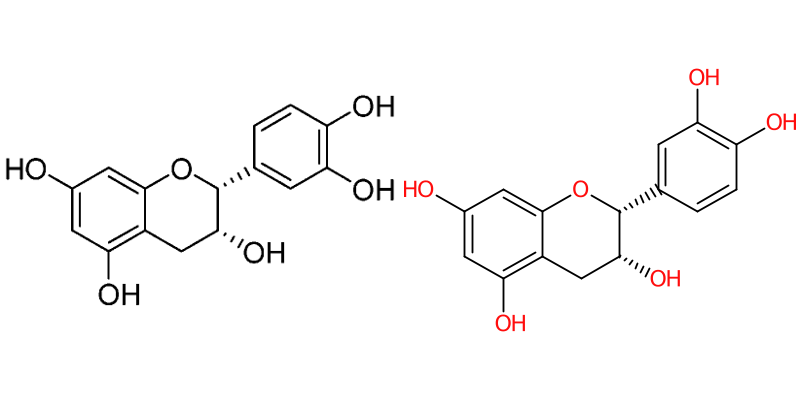

np070194x._2_9.png


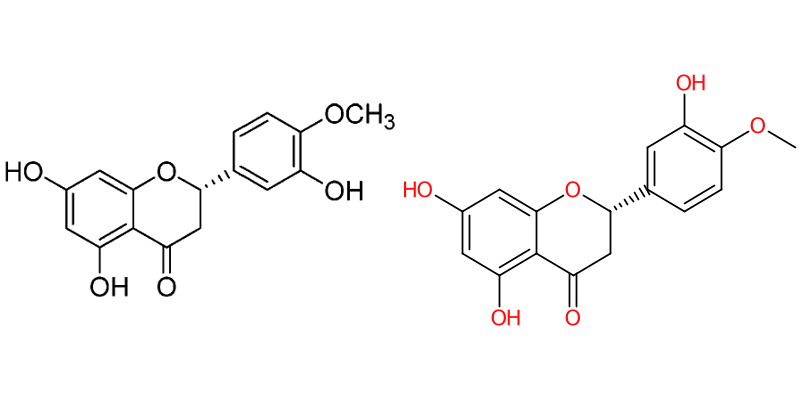

In [5]:
# Create an empty dataframe
df = pd.DataFrame()

# Define the columns you want in the dataframe
col1 = []
col2 = []

for key, value in my_dict.items():
    print(key)
    for i in range(len(value[0])):
        print(os.path.split(value[0][i])[1])
        if (len(value[1][i])) < 300:
            get_display(value[0][i], value[1][i])
            col1.append(os.path.split(value[0][i])[1])
            col2.append(value[1][i])

# Add the columns to the dataframe
df["Segment_title"] = col1
df["SMILES"] = col2

In [6]:
grid = DataGrid(df, base_row_size=30, base_column_size=300, editable=True)

In [7]:
grid

DataGrid(auto_fit_params={'area': 'all', 'padding': 30, 'numCols': None}, base_column_size=300, base_row_size=…

In [8]:
print(get_citation(get_doi(filename)))

Katavic, P. L., Lamb, K., Navarro, H., & Prisinzano, T. E. (2007). Flavonoids as Opioid Receptor Ligands:â Identification and Preliminary StructureâActivity Relationships. Journal of Natural Products, 70(8), 1278â1282. https://doi.org/10.1021/np070194x


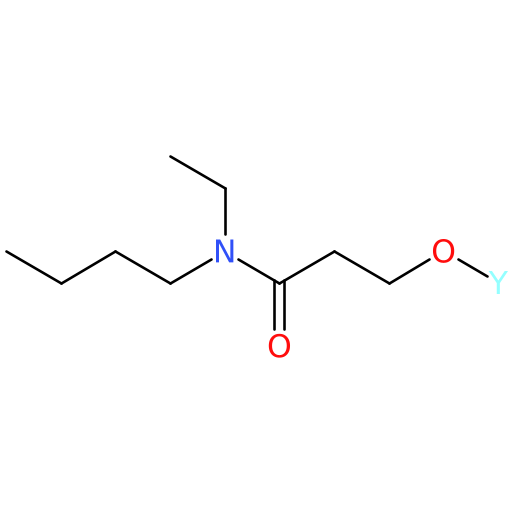

In [9]:
from depict import getCDKDepiction

getCDKDepiction("CCCCN(CC)C(=O)CCO[Y]")